In [1]:
import pandas as pd
from pandas import DataFrame
import os
import sys
import csv
from pathlib import Path
import seaborn as sns
sns.set()
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.show()
from collections import defaultdict
import os.path as op
import glob

os.chdir('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/gtdb')
matplotlib.__version__



'3.3.3'

rerun on 2021-12-07 after correcting for salinity of media samples

In [2]:

images='/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_images/GTDB_classification'
if os.path.isdir(images):
    print(images, "already exists.")
else:
    os.mkdir(images)
    print(images, "is created.")
    

/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_images/GTDB_classification already exists.


In [3]:
bac=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/gtdb/202108_SAGs_gtdb_classify_wf_out/gtdbtk.bac120.summary.tsv', sep='\t')                
bac

arc=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/gtdb/202108_SAGs_gtdb_classify_wf_out/gtdbtk.ar122.summary.tsv', sep='\t')                
arc
results=pd.concat([bac, arc])

results.to_csv('GoM_202108_gtdb_classify_wf_classifications_ar122_bac120.tsv', sep='\t')
results

,user_genome,classification,fastani_reference,fastani_reference_radius,fastani_taxonomy,fastani_ani,fastani_af,closest_placement_reference,closest_placement_radius,closest_placement_taxonomy,closest_placement_ani,closest_placement_af,pplacer_taxonomy,classification_method,note,"other_related_references(genome_id,species_name,radius,ANI,AF)",msa_percent,translation_table,red_value,warnings
0,AM-375-A11_contigs,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,GCF_000153745.1,95.0,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,98.19,0.93,GCF_000153745.1,95.0,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,98.19,0.93,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,taxonomic classification defined by topology a...,topological placement and ANI have congruent s...,"GCF_900197625.1, s__Amylibacter sp900197625, 9...",74.71,11,NaN,NaN
1,AM-375-A17_contigs,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,GCA_002685195.1,95.0,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,97.15,0.65,GCA_002685195.1,95.0,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,97.15,0.65,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,taxonomic classification defined by topology a...,topological placement and ANI have congruent s...,"GCA_004211905.1, s__HTCC2207 sp004211905, 95.0...",57.32,11,NaN,NaN
2,AM-375-A18_contigs,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,GCF_000173095.1,95.0,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,99.45,0.90,GCF_000173095.1,95.0,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,99.45,0.90,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,taxonomic classification defined by topology a...,topological placement and ANI have congruent s...,"GCA_009886625.1, s__MS024-2A sp009886625, 95.0...",29.50,11,NaN,NaN
3,AM-375-A19_contigs,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,GCA_000384935.1,95.0,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,97.32,0.86,GCA_000384935.1,95.0,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,97.32,0.86,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,taxonomic classification defined by topology a...,topological placement and ANI have congruent s...,"GCA_000385055.1, s__SCGC-AAA076-P13 sp00038505...",53.64,11,NaN,NaN
4,AM-375-A20_contigs,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,GCA_001438145.1,95.0,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,97.11,0.67,GCA_001438145.1,95.0,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,97.11,0.67,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,taxonomic classification defined by topology a...,topological placement and ANI have congruent s...,"GCA_003482475.1, s__OM182 sp003482475, 95.0, 7...",47.07,11,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,AM-384-N20_contigs,d__Archaea;p__Thermoplasmatota;c__Poseidoniia_...,GCA_000246735.1,95.0,d__Archaea;p__Thermoplasmatota;c__Poseidoniia_...,98.48,0.93,GCA_000246735.1,95.0,d__Archaea;p__Thermoplasmatota;c__Poseidoniia_...,98.48,0.93,d__Archaea;p__Thermoplasmatota;c__Poseidoniia_...,taxonomic classification defined by topology a...,topological placement and ANI have congruent s...,"GCA_009887095.1, s__MGIIa-L1 sp009887095, 95.0...",59.58,11,NaN,NaN
54,AM-384-O03_contigs,d__Archaea;p__Thermoplasmatota;c__Poseidoniia_...,NaN,NaN,NaN,NaN,NaN,GCA_002506275.1,95.0,d__Archaea;p__Thermoplasmatota;c__Poseidoniia_...,98.89,0.58,d__Archaea;p__Thermoplasmatota;c__Poseidoniia_...,taxonomic classification defined by topology a...,NaN,"GCA_002502605.1, s__MGIIa-L1 sp002502605, 95.0...",36.14,11,0.998275,Genome not assigned to closest species as it f...
55,AM-384-O05_contigs,d__Archaea;p__Thermoplasmatota;c__Poseidoniia_...,GCA_009887195.1,95.0,d__Archaea;p__Thermoplasmatota;c__Poseidoniia_...,99.21,0.79,GCA_009887195.1,95.0,d__Archaea;p__Thermoplasmatota;c__Poseidoniia_...,99.21,0.79,d__Archaea;p__Thermoplasmatota;c__Poseidoniia_...,taxonomic classification defined by topology a...,topological placement and ANI have congruent s...,"GCA_002726395.

In [4]:
classification=results[['user_genome', 'classification']].copy()
classification[['domain', 'phyla', 'class', 'order', 'family', 'genus', 'species']]=classification.classification.str.split(';', expand=True)
classification=classification.rename(columns = {'classification':'GTDBtk_classification'})
classification['count']=1
classification.to_csv('GoM_202108_gtdb_classify_wf_classifications_ar122_bac120.csv')
classification

,user_genome,GTDBtk_classification,domain,phyla,class,order,family,genus,species,count
0,AM-375-A11_contigs,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,g__Amylibacter,s__Amylibacter sp000153745,1
1,AM-375-A17_contigs,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pseudomonadales,f__Porticoccaceae,g__HTCC2207,s__HTCC2207 sp002685195,1
2,AM-375-A18_contigs,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Flavobacteriales,f__Flavobacteriaceae,g__MS024-2A,s__MS024-2A sp000173095,1
3,AM-375-A19_contigs,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__SAR86,f__D2472,g__SCGC-AAA076-P13,s__SCGC-AAA076-P13 sp000384935,1
4,AM-375-A20_contigs,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pseudomonadales,f__Pseudohongiellaceae,g__OM182,s__OM182 sp001438145,1
...,...,...,...,...,...,...,...,...,...,...
53,AM-384-N20_contigs,d__Archaea;p__Thermoplasmatota;c__Poseidoniia_...,d__Archaea,p__Thermoplasmatota,c__Poseidoniia_A,o__Poseidoniales,f__Poseidoniaceae,g__MGIIa-L1,s__MGIIa-L1 sp000246735,1
54,AM-384-O03_contigs,d__Archaea;p__Thermoplasmatota;c__Poseidoniia_...,d__Archaea,p__Thermoplasmatota,c__Poseidoniia_A,o__Poseidoniales,f__Poseidoniaceae,g__MGIIa-L1,s__,1
55,AM-384-O05_contigs,d__Archaea;p__Thermoplasmatota;c__Poseidoniia_...,d__Archaea,p__Thermoplasmatota,c__Poseidoniia_A,o__Poseidoniales,f__Poseidoniaceae,g__MGIIa-L1,s__MGIIa-L1 sp009887195,1
56,AM-384-P07_contigs,d__Archaea;p__Thermoplasmatota;c__Poseidoniia_...,d__Archaea,p__Thermoplasmatota,c__Poseidoniia_A,o__Poseidoniales,f__Poseidoniaceae,g__MGIIa-L1,s__MGIIa-L1 sp000246735,1


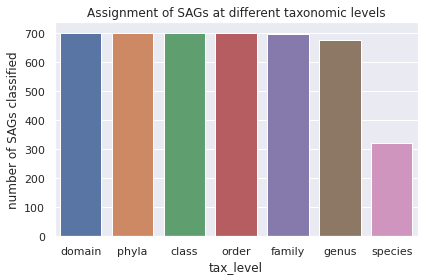

In [5]:
domain=classification[classification['domain']!='d__']
drows=len(domain)

phyla=classification[classification['phyla']!='p__']
prows=len(phyla)

cla=classification[classification['class']!='c__']
crows=len(cla)

order=classification[classification['order']!='o__']
orows=len(order)

family=classification[classification['family']!='f__']
frows=len(family)

genus=classification[classification['genus']!='g__']
grows=len(genus)

species=classification[classification['species']!='s__']
srows=len(species)

# create a plot showing how many cells are classified at each taxonomic level 
d={'tax_level': ['domain', 'phyla', 'class', 'order', 'family', 'genus','species'], 'number of SAGs classified': [drows, prows, crows, orows, frows, grows, srows]}
fig, ax = plt.subplots()
sns.set_style("white")
calssified=pd.DataFrame(data=d)
calssified
sns.set
sns.barplot(data=calssified, x='tax_level', y='number of SAGs classified')
ax.set_title('Assignment of SAGs at different taxonomic levels')

plt.tight_layout()
plt.savefig(images+"GTDB_taxonomic_levels.pdf")

In [6]:
! wc -l /mnt/scgc/simon/microg2p/Data/SAGs_WGS/NS2000/Aug_2021_GoM_respiration.csv

!wc -l /mnt/scgc/simon/microg2p/Data/SAGs_WGS/NS2000/211102_VH00511_31_AAAJ5NCHV_assembly_stats.csv
!wc -l /mnt/scgc/simon/microg2p/Data/SAGs_WGS/NS2000/211105_VH00511_32_AAAGTLKHV_assembly_stats.csv
702/766

766 /mnt/scgc/simon/microg2p/Data/SAGs_WGS/NS2000/Aug_2021_GoM_respiration.csv
384 /mnt/scgc/simon/microg2p/Data/SAGs_WGS/NS2000/211102_VH00511_31_AAAJ5NCHV_assembly_stats.csv
384 /mnt/scgc/simon/microg2p/Data/SAGs_WGS/NS2000/211105_VH00511_32_AAAGTLKHV_assembly_stats.csv


0.9164490861618799

### Big Question 
How many of the genera have more than 1 species present? I can not count the unassigned species but I can look at those with multiple assigned species.

In [7]:
# classify down to the Genus level and use this as my classification

classification=pd.read_csv('GoM_202108_gtdb_classify_wf_classifications_ar122_bac120.csv')
classification['phyla']=classification['phyla'].str[3:]
classification['class']=classification['class'].str[3:]
classification['order']=classification['order'].str[3:]
classification['family']=classification['family'].str[3:]
classification['genus']=classification['genus'].str[3:]
classification['species']=classification['species'].str[3:]
classification


classification['GTDB_classification'] = classification['phyla']

classification.loc[classification['class'] != '', 'GTDB_classification'] = classification['class']
classification.loc[classification['order'] != '', 'GTDB_classification'] = classification['order']
classification.loc[classification['family'] != '', 'GTDB_classification'] = classification['family']
classification.loc[classification['genus'] != '', 'GTDB_classification'] = classification['genus']

classification=classification.rename(columns={'user_genome':'SAG'})
classification.to_csv('202108_GoM_gtdb_classify_wf_classifications.csv')

classification

GTDB_class=classification[['SAG', 'GTDB_classification', 'GTDBtk_classification']]
GTDB_class['SAG']=GTDB_class['SAG'].str[:10]
GTDB_class

/mnt/scgc/scgc_nfs/opt/common/anaconda3a/envs/jacob_env/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,SAG,GTDB_classification,GTDBtk_classification
0,AM-375-A11,Amylibacter,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...
1,AM-375-A17,HTCC2207,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...
2,AM-375-A18,MS024-2A,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...
3,AM-375-A19,SCGC-AAA076-P13,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...
4,AM-375-A20,OM182,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...
...,...,...,...
697,AM-384-N20,MGIIa-L1,d__Archaea;p__Thermoplasmatota;c__Poseidoniia_...
698,AM-384-O03,MGIIa-L1,d__Archaea;p__Thermoplasmatota;c__Poseidoniia_...
699,AM-384-O05,MGIIa-L1,d__Archaea;p__Thermoplasmatota;c__Poseidoniia_...
700,AM-384-P07,MGIIa-L1,d__Archaea;p__Thermoplasmatota;c__Poseidoniia_...


/mnt/scgc/scgc_nfs/opt/common/anaconda3a/envs/jacob_env/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/mnt/scgc/scgc_nfs/opt/common/anaconda3a/envs/jacob_env/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,well,well_type,wga_cp,wgs_run_id,raw_read_count,final_assembly_length,max_contig_length,gc_content,checkM_estimated_completeness,number_multi_copy,checkM_classification,SSU_classification_1,SSU_classification_2,SSU_classification_3,notes,SAG,GTDB_classification,GTDBtk_classification
0,AM-375-A11,1 cell,2.182731,211102_VH00511_31_AAAJ5NCHV,3909441.0,1548103.0,84827.0,37.131444,70.64,0.0,k__Bacteria;p__Proteobacteria;c__Alphaproteoba...,no SSU regions found,NaN,NaN,NaN,AM-375-A11,Amylibacter,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...
1,AM-375-A15,1 cell,2.220337,211102_VH00511_31_AAAJ5NCHV,4005908.0,664532.0,54261.0,51.617680,24.15,0.0,k__Archaea;p__Euryarchaeota;unresolved,k__Archaea;p__Euryarchaeota;c__Thermoplasmata;...,NaN,NaN,NaN,AM-375-A15,MGIIa-L1,d__Archaea;p__Thermoplasmatota;c__Poseidoniia_...
2,AM-375-A17,1 cell,2.255345,211102_VH00511_31_AAAJ5NCHV,2547275.0,1426649.0,108423.0,44.433845,52.44,0.0,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,NaN,NaN,NaN,AM-375-A17,HTCC2207,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...
3,AM-375-A18,1 cell,2.231088,211102_VH00511_31_AAAJ5NCHV,3733972.0,907375.0,49781.0,36.062157,30.80,0.0,k__Bacteria;p__Bacteroidetes;c__Flavobacteriia...,k__Bacteria;p__Bacteroidetes;c__Flavobacteriia...,NaN,NaN,NaN,AM-375-A18,MS024-2A,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...
4,AM-375-A19,1 cell,2.170486,211102_VH00511_31_AAAJ5NCHV,3288101.0,885636.0,89861.0,34.283837,57.41,0.0,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,NaN,NaN,NaN,AM-375-A19,SCGC-AAA076-P13,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,AM-384-P17,1 cell,1.543603,211105_VH00511_32_AAAGTLKHV,5035234.0,1932852.0,375249.0,49.791759,74.80,0.0,k__Archaea;p__Euryarchaeota;unresolved,k__Archaea;p__Euryarchaeota;c__Thermoplasmata;...,NaN,NaN,NaN,AM-384-P17,Poseidonia,d__Archaea;p__Thermoplasmatota;c__Poseidoniia_...
762,AM-384-P18,1 cell,2.286216,211105_VH00511_32_AAAGTLKHV,3469253.0,131448.0,20384.0,57.558883,0.31,0.0,k__Bacteria;p__Proteobacteria;c__Alphaproteoba...,no SSU regions found,NaN,NaN,NaN,NaN,Unclassified,Unclassified
763,AM-384-P20,1 cell,1.601265,211105_VH00511_32_AAAGTLKHV,3511624.0,2063176.0,84704.0,56.971388,54.04,0.0,k__Bacteria;p__Verrucomicrobia;c__Opitutae;o__...,no SSUs were classified,NaN,NaN,NaN,AM-384-P20,IMCC26134_A,d__Bacteria;p__Verrucomicrobiota;c__Verrucomic...
764,AM-384-P22,1 cell,2.551501,211105_VH00511_32_AAAGTLKHV,4786111.0,777005.0,92559.0,45.012452,37.85,0.0,k__Bacteria;p__Bacteroidetes;c__Flavobacteriia...,k__Bacteria;p__Bacteroidetes;c__Flavobacteriia...,NaN,NaN,NaN,AM-384-P22,UBA10364,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...


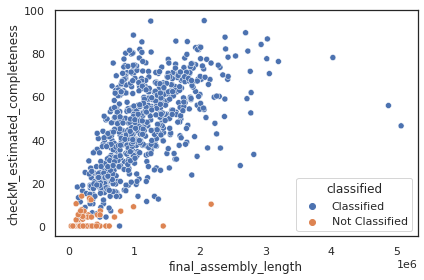

In [8]:
# Merge the general SAG statistics with classification output from the GTDB workflow. 
# Make sure to CHANGE the SAG_file variable
SAG_data=pd.read_csv('/mnt/scgc/simon/microg2p/Data/SAGs_WGS/NS2000/Aug_2021_GoM_respiration.csv')
SAG_data=SAG_data.merge(GTDB_class, how='left', left_on='well', right_on='SAG')
SAG_data[['GTDB_classification', 'GTDBtk_classification']]=SAG_data[['GTDB_classification', 'GTDBtk_classification']].replace(np.nan, 'Unclassified', regex=True)


SAG_data.to_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/Summary_files/GoM_202108_SAGs_GTDBclass.csv')
SAG_data

# create a graph of genome size vs completeness labeled with wether or not GTDB classified the cell
class_parameters=SAG_data[['well', 'final_assembly_length', 'GTDB_classification', 'checkM_estimated_completeness']]
class_parameters['classified']=np.where(class_parameters['GTDB_classification'] != 'Unclassified', 'Classified', 'Not Classified')
class_parameters['checkM_estimated_completeness']=class_parameters['checkM_estimated_completeness'].fillna(0)
class_parameters=class_parameters.sort_values(by='classified')
class_parameters
sns.scatterplot(data=class_parameters, x='final_assembly_length', y='checkM_estimated_completeness', hue='classified')
plt.tight_layout()
plt.savefig(images+"202108_GoM_GTDB_classification_size_vs_completeness.pdf")
class_parameters
SAG_data

In [9]:
unique_class=SAG_data.GTDB_classification.unique()
unique_class

File=open('unique_GTDSB_classifications.txt','w')

for element in unique_class:
    File.write(element)
    File.write('\n')  
File.close()
unique_class

array(['Amylibacter', 'MGIIa-L1', 'HTCC2207', 'MS024-2A',
       'SCGC-AAA076-P13', 'OM182', 'UBA3537', 'Luminiphilus',
       'SCGC-AAA160-P02', 'Unclassified', 'BACL24', 'UBA8337', 'SGZJ01',
       'SAT2731', 'Planktomarina', 'Flavobacteriales', 'AAA536-G10',
       'MED722', 'UBA4441', 'CAU-1491', 'Pelagibacter', 'UBA10364',
       'Pelobium', 'Vibrio', 'UBA9926', 'BACL14', 'Micavibrionaceae',
       'Chlamydiales', 'D2472', 'LGRT01', 'Actinomarina', 'Ulvibacter_B',
       'GCA-2862585', 'UBA3439', 'Poseidonia', 'HIMB30', 'Mariniblastus',
       'HIMB59', 'UBA7430', 'UBA729', 'Erythrobacter_A', 'UBA4421',
       'MGIIa-L2', 'Thioglobus_A', 'BACL21', 'VMCP01', 'SW10',
       'Polaribacter', 'Tateyamaria', 'GCA-002686595', 'MAG-121220-bin8',
       'Sulfurimonas', 'Paracoccus', 'UBA7428', 'Rhodobacteraceae',
       'UBA4582', 'SP4260', 'UBA1997', 'MED-G20', 'UBA8316', 'Thioglobus',
       'UBA4466', 'UBA6772', 'HIMB11', 'GCA-002733105', 'Winogradskyella',
       'RS24', 'Zobellia', 'G

In [10]:
outdir='/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/Summary_files/'

In [11]:
from collections import Counter
Counter(SAG_data['GTDB_classification'])

Counter({'Amylibacter': 36,
         'MGIIa-L1': 37,
         'HTCC2207': 35,
         'MS024-2A': 12,
         'SCGC-AAA076-P13': 26,
         'OM182': 12,
         'UBA3537': 5,
         'Luminiphilus': 39,
         'SCGC-AAA160-P02': 17,
         'Unclassified': 65,
         'BACL24': 6,
         'UBA8337': 34,
         'SGZJ01': 7,
         'SAT2731': 1,
         'Planktomarina': 35,
         'Flavobacteriales': 1,
         'AAA536-G10': 8,
         'MED722': 1,
         'UBA4441': 1,
         'CAU-1491': 3,
         'Pelagibacter': 75,
         'UBA10364': 25,
         'Pelobium': 1,
         'Vibrio': 1,
         'UBA9926': 5,
         'BACL14': 2,
         'Micavibrionaceae': 1,
         'Chlamydiales': 1,
         'D2472': 20,
         'LGRT01': 11,
         'Actinomarina': 12,
         'Ulvibacter_B': 1,
         'GCA-2862585': 2,
         'UBA3439': 14,
         'Poseidonia': 8,
         'HIMB30': 9,
         'Mariniblastus': 4,
         'HIMB59': 8,
         'UBA7430': 2,
  

# I am not ready to delete the code below but I do not think that it is going to be necessary for the current analysis.

In [12]:
# columns=['name', 'final_assembly_length', 'gc_content', 'estimated_diameter', 'Sample_collection_Date', 'gate',
#          'GTDB_classification', 'checkM_estimated_completeness', 'total_CDS_count', 'hypothetical_cds_fraction', 'FACS_date']
# SAG_data=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/Summary_files/All_GoM_SAGs_1cell_20kb_decon_531normalized_predresp_rate_GTDBclass.csv', 
#                      usecols=columns)

# SAG_data

In [13]:
# Syto9_SAGs=SAG_data[SAG_data.gate=='All prokaryotes (SYTO-9-positive)']


# #Syto9_SAGs['Sample_collection_Date']=Syto9_SAGs['Sample_collection_Date'].astype(str)
# Syto9_SAGs['count']=1

# Syto9_genus_counts=pd.pivot_table(Syto9_SAGs, index='GTDB_classification', values='count', aggfunc=np.sum)
# Syto9_tencell_genera=Syto9_genus_counts[Syto9_genus_counts['count'] >=10].copy()
# Syto9_tencell_genera=Syto9_tencell_genera.reset_index()
# Syto9_tencell_list=Syto9_tencell_genera['GTDB_classification'].values.tolist()
# Syto9_tencell_list

# MyFile=open(outdir+ 'Genera_with_10+_Syto9_SAGs.txt','w')

# for element in Syto9_tencell_list:
#      MyFile.write(element)
#      MyFile.write('\n')
# MyFile.close()


# Syto9_SAGs=Syto9_SAGs[Syto9_SAGs.Sample_collection_Date==Syto9_SAGs.FACS_date]

# Syto_pivot=pd.pivot_table(Syto9_SAGs, index='GTDB_classification', values='count', columns='Sample_collection_Date', aggfunc=np.sum)

# Syto_pivot['170412_SAG_abundnance']=Syto_pivot[170412]/Syto_pivot[170412].sum()
# Syto_pivot['170818_SAG_abundnance']=Syto_pivot[170818]/Syto_pivot[170818].sum()
# Syto_pivot['171102_SAG_abundnance']=Syto_pivot[171102]/Syto_pivot[171102].sum()
# Syto_pivot['181030_SAG_abundnance']=Syto_pivot[181030]/Syto_pivot[181030].sum()
# Syto_pivot['190402_SAG_abundnance']=Syto_pivot[190402]/Syto_pivot[190402].sum()
# Syto_pivot['190709_SAG_abundnance']=Syto_pivot[190709]/Syto_pivot[190709].sum()

# Syto_pivot

In [14]:
# RSG_SAGs=SAG_data[SAG_data.gate == 'Respiring cells (RSG-positive)']

# RSG_SAGs['count']=1


# RSG_genus_counts=pd.pivot_table(RSG_SAGs, index='GTDB_classification', values='count', aggfunc=np.sum)
# RSG_tencell_genera=RSG_genus_counts[RSG_genus_counts['count'] >=10].copy()
# RSG_tencell_genera=RSG_tencell_genera.reset_index()
# RSG_tencell_list=RSG_tencell_genera['GTDB_classification'].values.tolist()
# RSG_tencell_list

# MyFile=open(outdir+ 'Genera_with_10+_RSG_SAGs.txt','w')

# for element in RSG_tencell_list:
#      MyFile.write(element)
#      MyFile.write('\n')
# MyFile.close()


# RSG_SAGs=RSG_SAGs[RSG_SAGs.Sample_collection_Date==RSG_SAGs.FACS_date]

# RSG_pivot=pd.pivot_table(RSG_SAGs, index='GTDB_classification', values='count', columns='Sample_collection_Date', aggfunc=np.sum)

# RSG_pivot['170412_SAG_abundnance']=RSG_pivot[170412]/RSG_pivot[170412].sum()
# RSG_pivot['170818_SAG_abundnance']=RSG_pivot[170818]/RSG_pivot[170818].sum()
# RSG_pivot['171102_SAG_abundnance']=RSG_pivot[171102]/RSG_pivot[171102].sum()
# RSG_pivot['181030_SAG_abundnance']=RSG_pivot[181030]/RSG_pivot[181030].sum()
# RSG_pivot['190402_SAG_abundnance']=RSG_pivot[190402]/RSG_pivot[190402].sum()
# RSG_pivot['190709_SAG_abundnance']=RSG_pivot[190709]/RSG_pivot[190709].sum()

# RSG_pivot

In [15]:

# Syto_pivot.to_csv(outdir+ '202108_GoM_Syto9_SAG_abundances.csv')
# RSG_pivot.to_csv(outdir+ '202108_GoM_RSG_SAG_abundances.csv')



In [16]:
# # create a list of genera with 10+ SAGs
# SAG_data['count']=1
# genus_counts=pd.pivot_table(SAG_data, index='GTDB_classification', values='count', aggfunc=np.sum)
# genus_counts

# tencell_genera=genus_counts[genus_counts['count'] >=10].copy()
# tencell_genera=tencell_genera.reset_index()
# tencell_list=tencell_genera['GTDB_classification'].values.tolist()
# tencell_list

# MyFile=open(outdir+ '202108_GoM_Genera_with_10+_SAGs.txt','w')

# for element in tencell_list:
#      MyFile.write(element)
#      MyFile.write('\n')
# MyFile.close()
